In [1]:
from chemkin import *
import chemkin.parser
import chemkin.nasa
import matplotlib.pyplot as plt
import base64
from io import BytesIO

In [2]:
def range_data_collection(user_data,input_concentration,lower_T,upper_T,current_T,):
    """
    user_data: Read data from website that user uploaded
    input_concentration: The concentrations of species input by users
    lower_T: The lower bound of temperature range
    upper_T: the upper bound of temperature range
    current_T: The temperature of the current reaction
    """
    
    reaction_data = user_data
    species = reaction_data.species
    concentration = input_concentration
    temp_range = range(lower_T,upper_T+1)
    progress_rates_list = [None]*len(temp_range)
    reaction_rates_list = [None]*len(temp_range)
    
    for i,temp in enumerate(temp_range):
        progress_rates = reaction_data.get_progress_rate(concentration,temp)
        progress_rates_list[i] = progress_rates
        reaction_rates_list[i] = reaction_data.get_reaction_rate(progress_rates)
    #print(len(temp_range),len(progress_rates_list))
    return temp_range,progress_rates_list,reaction_rates_list,current_T,species


In [3]:
def progress_rate_plot_generation(T_range,progress_rate_range,current_T,pic_width,pic_length):
    """
    T_range: range of temperature indicated by user/as default
    progress_rate_range: calculated from range_data_collection function
    current_T: The temperature of the current reaction
    """
    x = T_range
    curr_T = current_T
    
    # generate colors for the scatterplot
    currT_index = x.index(curr_T)
    #colors = ['blue' for i in range(currT_index)]
    #colors.append('red')
    #colors.extend(['blue' for i in range(currT_index+1,len(x))])
    
    
    # generate plot
    plt.figure(figsize=(pic_width,pic_length))
    
    reaction_num = len(progress_rate_range[0])
    for i in range(reaction_num):
        # generate a curve for each elementary reaction
        y = [e[i] for e in progress_rate_range]
        plt.plot(x, y)
        plt.scatter(x,y,label='Elementary Reaction '+str(i+1))
        plt.plot(curr_T,y[currT_index],'or')
    plt.xlabel("Temperature")
    plt.ylabel("Progress Rate")
    plt.title("Progress Rate vs Temperature by Reactions")
    plt.legend()
    plt.show()
    
    # output plot in base64 format
    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)  # rewind to beginning of file
    figdata_png = base64.b64encode(figfile.getvalue())
    return figdata_png

In [4]:
def reaction_rate_plot_generation(T_range,reaction_rate_range,current_T,species,pic_width,pic_length):
    """
    T_range: range of temperature indicated by user/as default
    reaction_rate_range: calculated from range_data_collection function
    current_T: The temperature of the current reaction
    """
    x = T_range
    curr_T = current_T
    
    # generate colors for the scatterplot
    currT_index = x.index(curr_T)
    #colors = ['blue' for i in range(currT_index)]
    #colors.append('red')
    #colors.extend(['blue' for i in range(currT_index+1,len(x))])
    
    
    # generate plot
    plt.figure(figsize=(pic_width,pic_length))
    
    species_num = len(reaction_rate_range[0])
    for i in range(species_num):
        # generate a curve for each elementary reaction
        y = [e[i] for e in reaction_rate_range]
        plt.plot(x, y,label=None)
        plt.scatter(x,y,label=species[i])
        plt.plot(curr_T,y[currT_index],'or')
    plt.xlabel("Temperature")
    plt.ylabel("Reaction Rate")
    plt.title("Reaction Rate vs Temperature by Species")
    plt.legend()
    plt.show()
    
    # output plot in base64 format
    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)  # rewind to beginning of file
    figdata_png = base64.b64encode(figfile.getvalue())
    return figdata_png

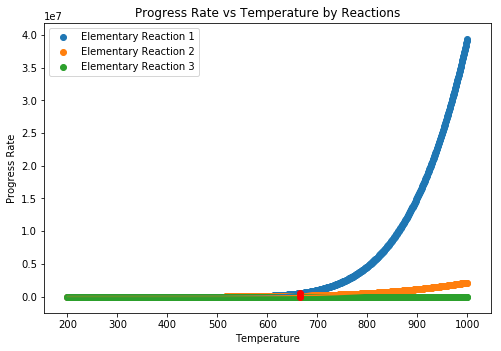

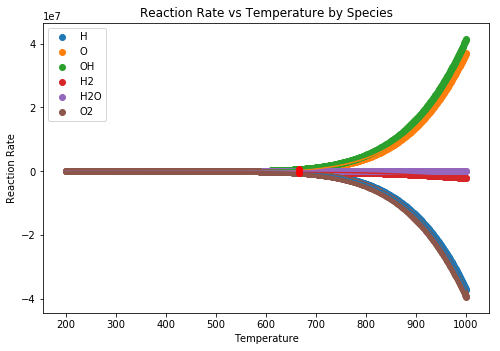

In [5]:
if __name__ == '__main__':
    # test with sample data
    nasa = chemkin.nasa.NASACoeffs()
    data_parser = chemkin.parser.DataParser()
    user_data = data_parser.parse_file("rxns.xml",nasa)
    input_concentration = [1,2,3,4,5,6]
    current_T = 666
    lower_T = 200
    upper_T = 1000
    T_range,progress_rate_range,reaction_rate_range,current_T,species = \
    range_data_collection(user_data,input_concentration,lower_T,upper_T,current_T)
    
    #print('Here!',len(T_range),len(progress_rate_range))
    
    pic_width = 600/75
    pic_length = 400/75
    
    progress_plot = progress_rate_plot_generation(T_range,progress_rate_range,current_T,pic_width,pic_length)
    reaction_plot = reaction_rate_plot_generation(T_range,reaction_rate_range,current_T,species,pic_width,pic_length)
    